### Import libraries


In [9]:
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Activation, MaxPooling2D, Flatten, Dense

### Loading dataset



In [5]:
x_train = np.loadtxt('input.csv', delimiter=',')
y_train = np.loadtxt('labels.csv', delimiter=',')

x_test = np.loadtxt('input_test.csv', delimiter=',')
y_test = np.loadtxt('labels_test.csv', delimiter=',')

In [6]:
x_train = x_train.reshape(len(x_train),100,100,3)
y_train = y_train.reshape(len(y_train),1)

x_test = x_test.reshape(len(x_test),100,100,3)
y_test = y_test.reshape(len(y_test),1)

x_train = x_train / 255.0
x_test = x_test / 255.0

In [7]:
print("Shape of x_train:", x_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of x_test:", x_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of x_train: (2000, 100, 100, 3)
Shape of y_train: (2000, 1)
Shape of x_test: (400, 100, 100, 3)
Shape of y_test: (400, 1)


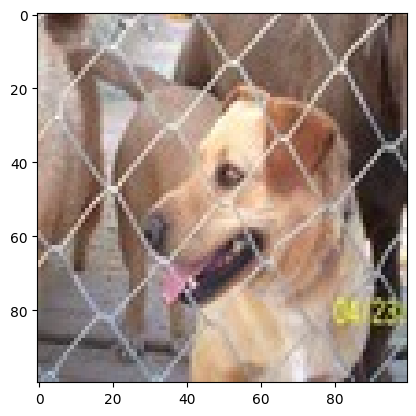

In [12]:
idx=random.randint(0, len(x_train))
plt.imshow(x_train[idx,:])
plt.show()

In [13]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid'),
])

C:\Users\91939\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

C:\Users\91939\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [17]:
model.fit(x_train, y_train, epochs=5, batch_size=64)

Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 119ms/step - accuracy: 0.8335 - loss: 0.3958
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 127ms/step - accuracy: 0.8310 - loss: 0.3586
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 135ms/step - accuracy: 0.8750 - loss: 0.2975
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 122ms/step - accuracy: 0.8955 - loss: 0.2541
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 127ms/step - accuracy: 0.9275 - loss: 0.2025


In [18]:
model.evaluate(x_test,y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.6300 - loss: 0.7997


[0.7996795177459717, 0.6299999952316284]

### Making Predictions


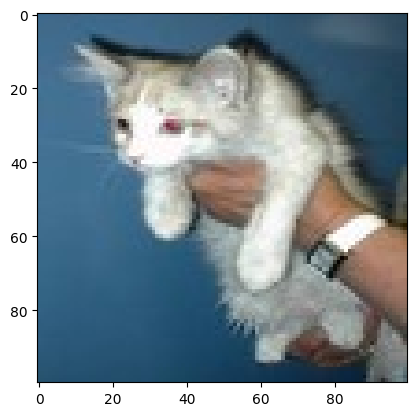

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
Our model prediction: cat


In [27]:
idx2 = random.randint(0, len(x_test))
plt.imshow(x_test[idx2,:])
plt.show()

y_pred = model.predict(x_test[idx2,:].reshape(1,100,100,3))
y_pred=y_pred>0.5

if y_pred==0:
    pred="cat"
    
else:
    pred="dog"

print("Our model prediction:", pred)